# CNN para classificação

Este notebook apesenta a contrução de uma Rede Neural de CNN para resolver o problema de classificação de vestuário. A base de dados utilizando encontra-se disponível no site https://github.com/zalandoresearch/fashion-mnist. Esta base de dados consiste de 65000 imagens as quais podem ser classificadas nas seguintes classes: 

*	T-shirt/top
*	Trouser
*	Pullover
*	Dress
*	Coat
*	Sandal
*	Shirt
*   Sneaker
*	Bag
*	Ankle boot

Alguns exemplos das imagens contidas nesta base de dados são apresentados a seguir:

![alt text](fashion-mnist-sprite.png "Exemplos")

## Carregamento dos pacotes a serem utilizados

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Carregamento do dataset

In [2]:
# fashion_mnist = keras.datasets.fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

## Explorando o dataset

In [4]:
print("numero de amostras de treinamento", len(train_images))
print("numero de amostras de teste", len(test_images))

numero de amostras de treinamento 60000
numero de amostras de teste 10000


In [5]:
print("Dimensões dos dados de entrada", train_images.shape)
print("Dimensões dos dados do target", train_labels.shape)

Dimensões dos dados de entrada (60000, 28, 28)
Dimensões dos dados do target (60000,)


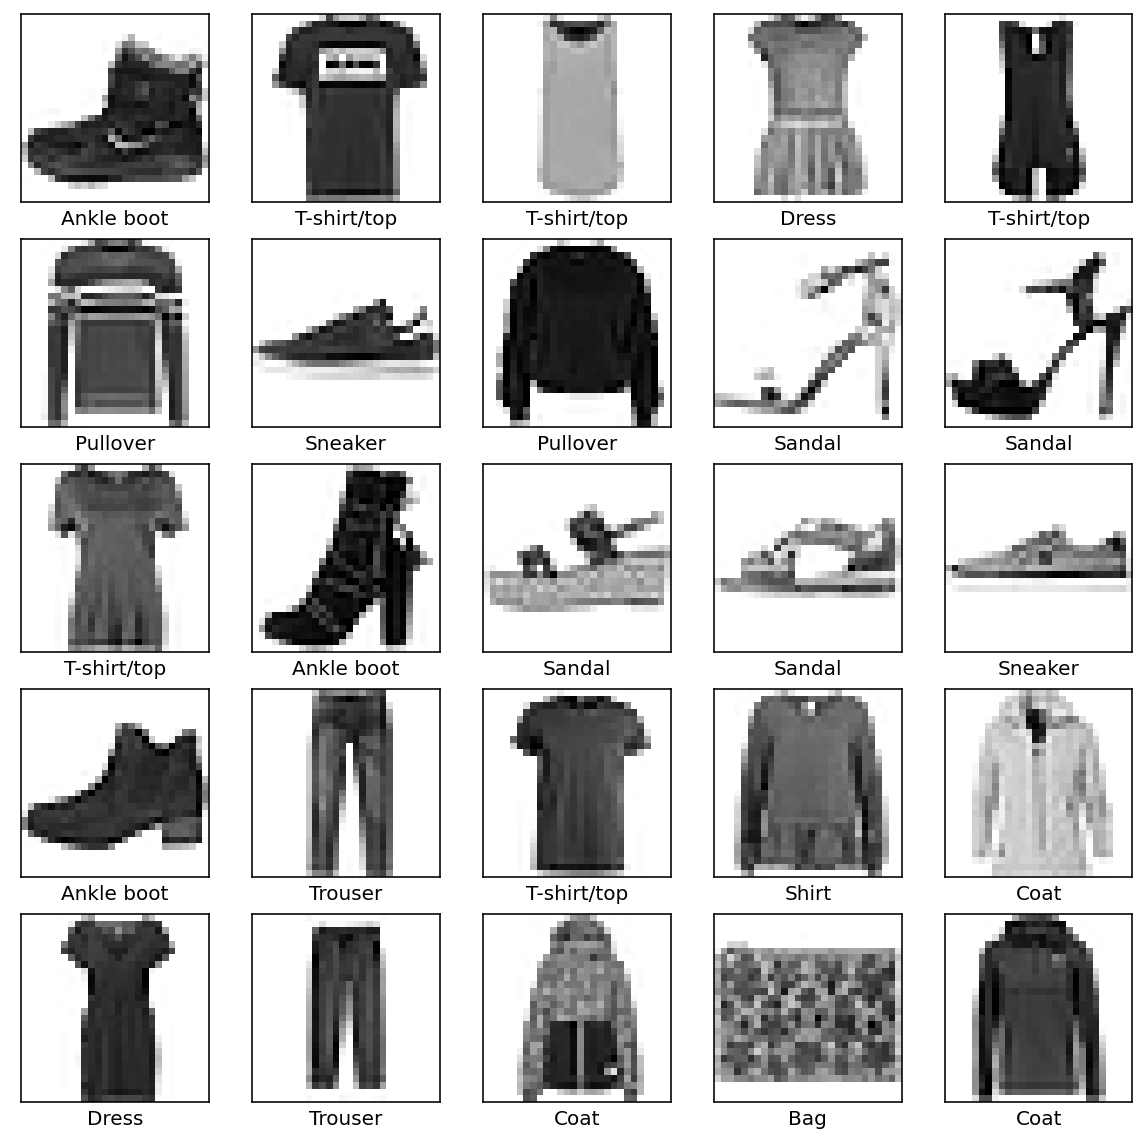

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Existem diversas ferramentas de visualização de dados multidimensionais, entre elas destaca-se a tecnica t-SNET (https://distill.pub/2016/misread-tsne/). Um exemplo de visualização empregando a base de dados descrita neste notebook é apresentado a seguir.  
![alt text](embedding_fashion_mnist.gif "Title")

Exemplo online http://projector.tensorflow.org/

In [7]:
print("Máximo e Mínimo do conjunto de treinamento", np.max(train_images), "/", np.min(train_images))

Máximo e Mínimo do conjunto de treinamento 255 / 0


## Ajustando a dimensão da imagem:

Neste exemplo devido ao tipo de rede que sera implementada, é necessario fornecer como entrada do modelo um tensor 4D com as seguintes caracteristicas: [num_batch, dim1, dim2, num_canais]

In [8]:
print("shape da entrada: ", train_images.shape)

shape da entrada:  (60000, 28, 28)


In [9]:
train_images = np.expand_dims(train_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)

In [10]:
print("shape da entrada: ", train_images.shape)

shape da entrada:  (60000, 28, 28, 1)


## Dividindo o conjunto de validação

Dessa vez faremos a divisão entre treino e validação de forma controlada e fora do model.fit()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                    stratify=train_labels, 
                                                    test_size=0.2)

## Definição do modelo

Na próxima caixa de código você implementara um modelo de rede neural CNN, serão explorados 4 diferentes configurações.

1) CNN convencional: conv-->maxpool-->conv-->maxpool-->Densa-->Densa-->predição

2) CNN + dropout: conv-->maxpool-->conv-->maxpool-->Densa-->Dropout-->Densa-->predição

3) CNN + batch normalization: conv-->BN-->ReLu-->maxpool-->conv-->BN-->ReLu-->maxpool-->Densa-->Densa-->predição

4) CNN + Global average pooling: conv-->maxpool-->conv-->GAP-->Densa-->Densa-->predição

Dica:

keras.layers.Conv2D

keras.layers.Activation

keras.layers.MaxPool2D

keras.layers.Flatten

keras.layers.Dense

keras.layers.Dropout

keras.layers.BatchNormalization

keras.layers.GlobalAveragePooling2D

- CNN convencional

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- CNN + Dropout

In [14]:
model2 = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

- CNN + batch normalization

In [15]:
model3 = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Conv2D(10, kernel_size=3, activation='relu', padding='valid'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- CNN + global average pooling

In [16]:
model4 = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=None),
    keras.layers.Conv2D(10, kernel_size=3, activation='relu', input_shape=(28,28,1), padding='valid'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


### Pergunta:
- Qual é a dimensão da saida da ultima camada de maxpooling no modelo CNN convencional?

In [17]:
print("modelo 1: ", model.summary())
print("modelo 4: ", model4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                3765      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Compilação do modelo

Depois de definir a arquitetura para o treinamento, são necessários outros ajustes, os quais são adicionados durante a compilação do modelo:
- Função custo: Mede a precisão do modelo durante o treinamento. É a função que queremos minimizar para "direcionar" o modelo na direção certa.
- Otimizado: Método de otimização do modelo, visando a minimização da função custo.
- Métrica: Usada para monitorar o treinamento, validação e teste do modelo.

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinamento da rede neural:

Forneça os pares de entrada saída para o modelo, estes dados serão utilizados para ajustar os parâmetros do modelo. Para verificar o sobre ajuste do modelo (overfitting), será utilizado 20% dos dados de treinamento previamente separados, e um mecanismo de parada prematura será utilizado de tal forma que o melhor modelo seja salvo. 

Para começar o treinamento, chame o método model.fit.

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('fashion_cnn_model.h5', save_best_only=True, monitor='val_loss', mode='min')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [23]:
history = model.fit(X_train, y_train, batch_size=40, validation_data=(X_val,y_val), epochs=5,
                    verbose=True, callbacks=[earlyStopping, mcp_save])

Epoch 1/5
1200/1200 [==============================] - 19s 16ms/step - loss: 1.9922 - accuracy: 0.3470 - val_loss: 1.5215 - val_accuracy: 0.3786
Epoch 2/5
1200/1200 [==============================] - 18s 15ms/step - loss: 1.1865 - accuracy: 0.5282 - val_loss: 0.9418 - val_accuracy: 0.6101
Epoch 3/5
1200/1200 [==============================] - 18s 15ms/step - loss: 0.8362 - accuracy: 0.6648 - val_loss: 0.6977 - val_accuracy: 0.7233
Epoch 4/5
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6355 - accuracy: 0.7500 - val_loss: 0.6036 - val_accuracy: 0.7630
Epoch 5/5
1200/1200 [==============================] - 18s 15ms/step - loss: 0.5515 - accuracy: 0.7804 - val_loss: 0.5533 - val_accuracy: 0.7799


In [24]:
history2 = model2.fit(X_train, y_train, batch_size=40, validation_data=(X_val,y_val), epochs=5,
                    verbose=True, callbacks=[earlyStopping, mcp_save])

Epoch 1/5
1200/1200 [==============================] - 19s 16ms/step - loss: 1.9055 - accuracy: 0.4462 - val_loss: 0.8231 - val_accuracy: 0.7227
Epoch 2/5
1200/1200 [==============================] - 20s 16ms/step - loss: 0.9906 - accuracy: 0.6397 - val_loss: 0.6698 - val_accuracy: 0.7542
Epoch 3/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.8695 - accuracy: 0.6789 - val_loss: 0.6117 - val_accuracy: 0.7804
Epoch 4/5
1200/1200 [==============================] - 19s 15ms/step - loss: 0.8058 - accuracy: 0.7018 - val_loss: 0.5839 - val_accuracy: 0.7888
Epoch 5/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.7479 - accuracy: 0.7172 - val_loss: 0.5487 - val_accuracy: 0.7954


In [25]:
history3 = model3.fit(X_train, y_train, batch_size=40, validation_data=(X_val,y_val), epochs=5,
                    verbose=True, callbacks=[earlyStopping, mcp_save])

Epoch 1/5
1200/1200 [==============================] - 34s 28ms/step - loss: 0.5672 - accuracy: 0.8010 - val_loss: 0.4248 - val_accuracy: 0.8485
Epoch 2/5
1200/1200 [==============================] - 33s 27ms/step - loss: 0.3667 - accuracy: 0.8654 - val_loss: 0.3888 - val_accuracy: 0.8584
Epoch 3/5
1200/1200 [==============================] - 34s 28ms/step - loss: 0.3284 - accuracy: 0.8798 - val_loss: 0.3913 - val_accuracy: 0.8583
Epoch 4/5
1200/1200 [==============================] - 34s 28ms/step - loss: 0.3075 - accuracy: 0.8861 - val_loss: 0.3464 - val_accuracy: 0.8738
Epoch 5/5
1200/1200 [==============================] - 33s 28ms/step - loss: 0.2902 - accuracy: 0.8921 - val_loss: 0.3274 - val_accuracy: 0.8850


In [26]:
history4 = model4.fit(X_train, y_train, batch_size=40, validation_data=(X_val,y_val), epochs=5,
                    verbose=True, callbacks=[earlyStopping, mcp_save])

Epoch 1/5
1200/1200 [==============================] - 17s 14ms/step - loss: 1.0770 - accuracy: 0.6126 - val_loss: 0.7560 - val_accuracy: 0.7291
Epoch 2/5
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6750 - accuracy: 0.7542 - val_loss: 0.6434 - val_accuracy: 0.7635
Epoch 3/5
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6014 - accuracy: 0.7804 - val_loss: 0.5980 - val_accuracy: 0.7829
Epoch 4/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.5579 - accuracy: 0.7964 - val_loss: 0.5492 - val_accuracy: 0.8050
Epoch 5/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.5279 - accuracy: 0.8096 - val_loss: 0.5335 - val_accuracy: 0.8129


## Plot histórico do treinamento e validação

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


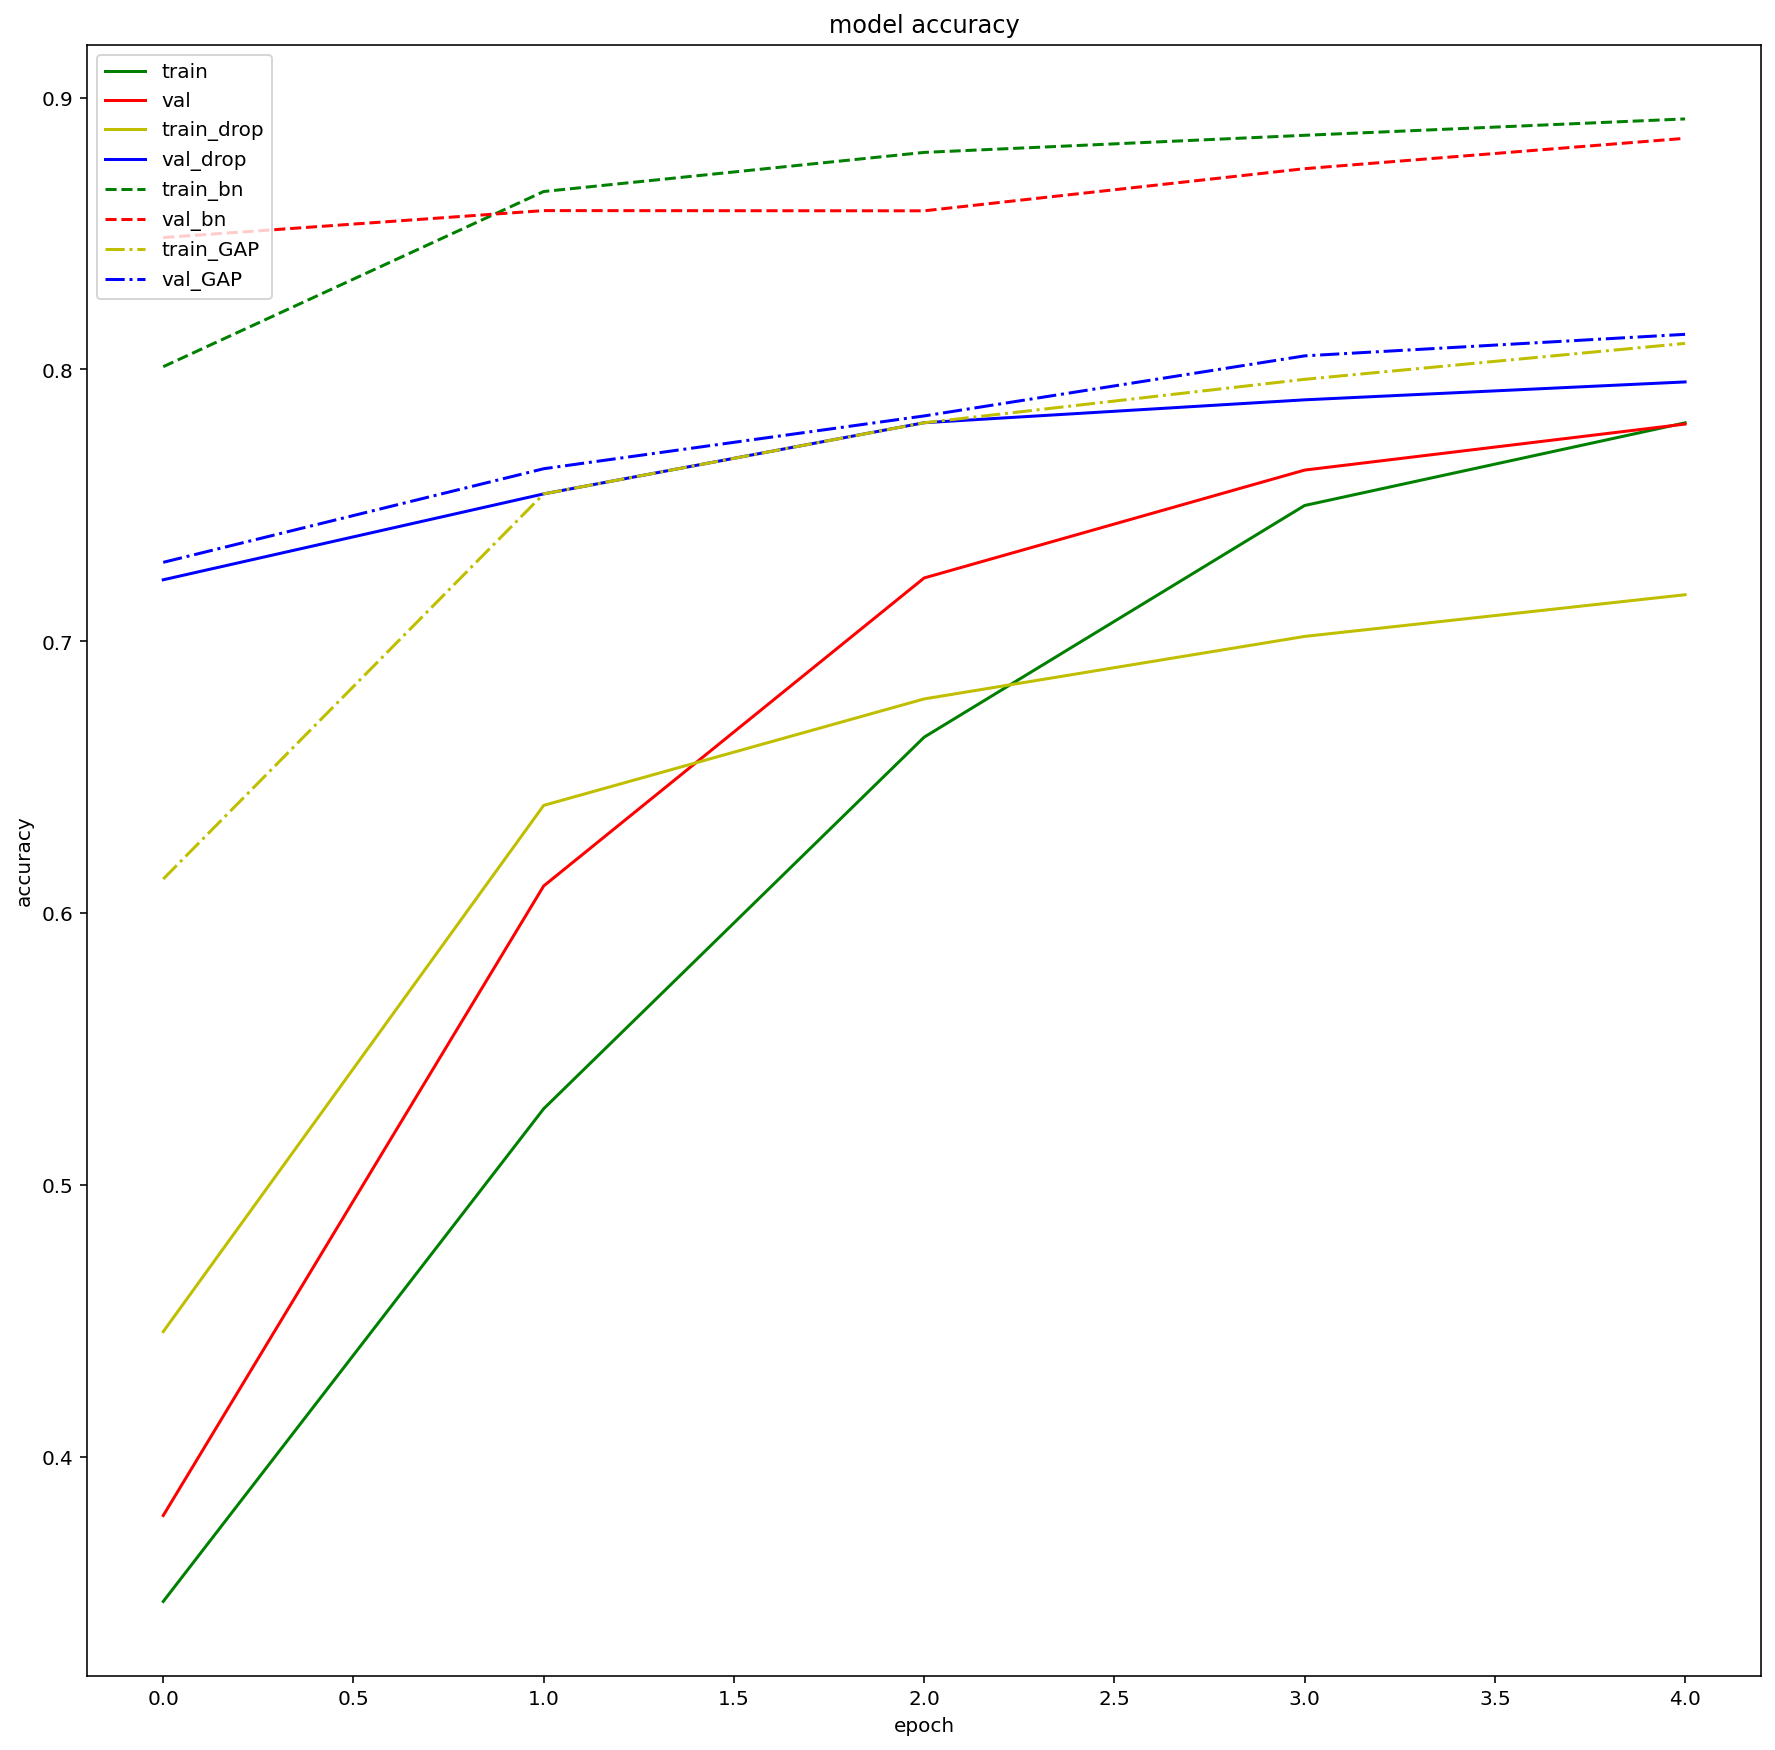

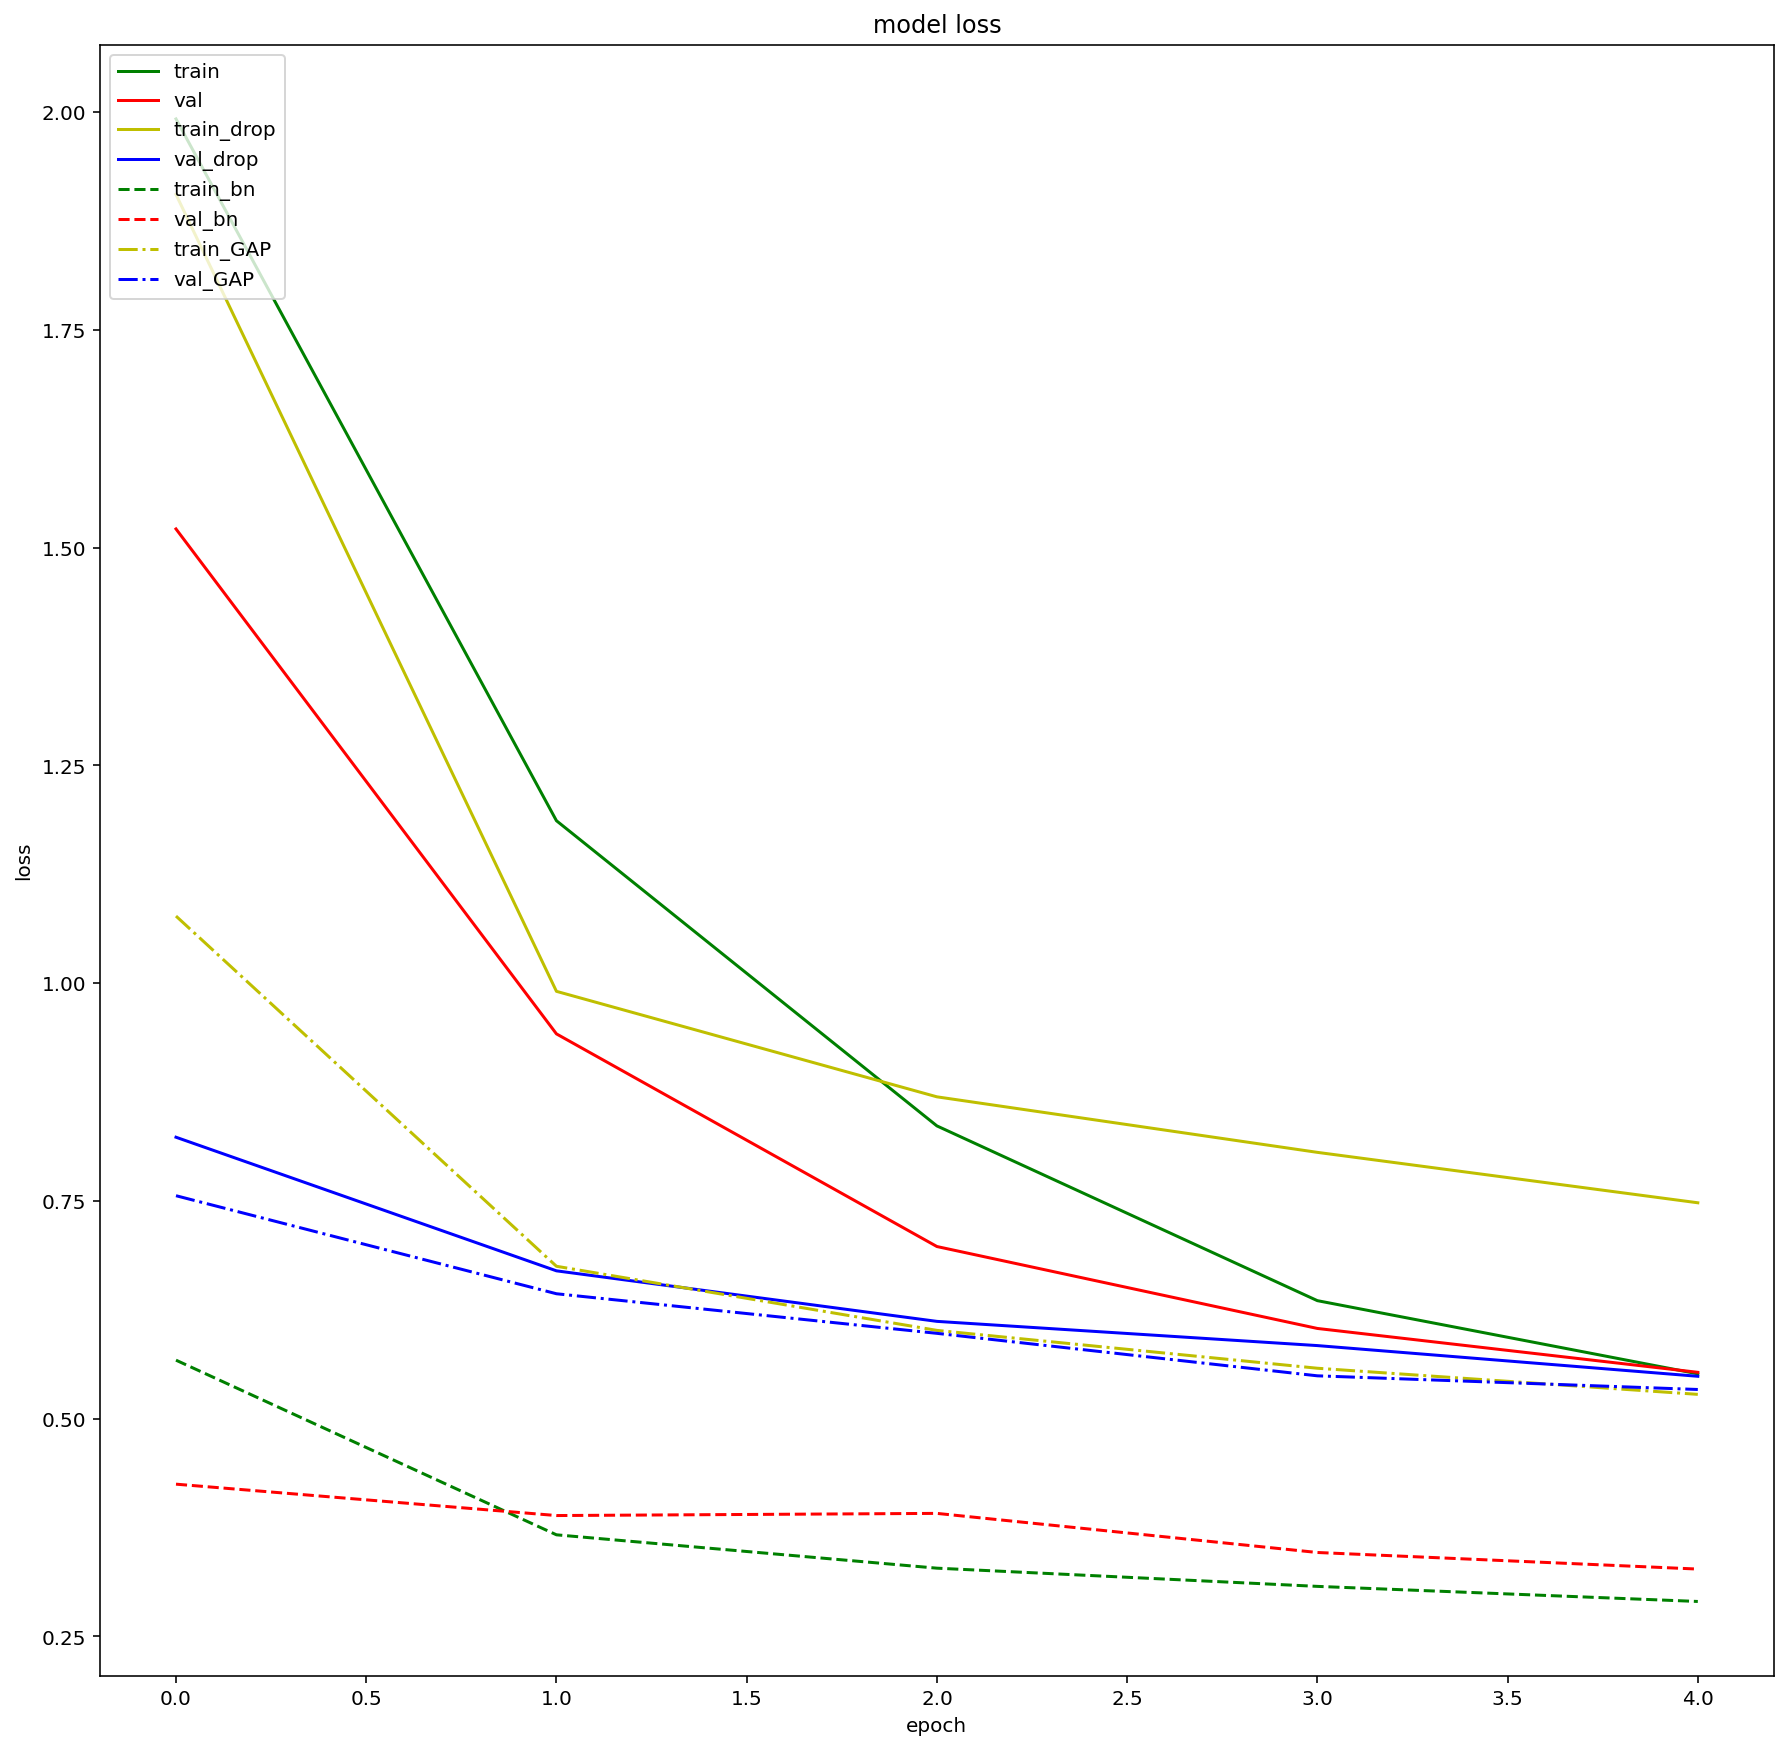

In [27]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(15,15))
# summarize history for accuracy
plt.plot(history.history['accuracy'],"g")
plt.plot(history.history['val_accuracy'],"r")
plt.plot(history2.history['accuracy'],"y")
plt.plot(history2.history['val_accuracy'],'b')
plt.plot(history3.history['accuracy'],"--g")
plt.plot(history3.history['val_accuracy'],'--r')
plt.plot(history4.history['accuracy'],"-.y")
plt.plot(history4.history['val_accuracy'],'-.b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val','train_drop', 'val_drop','train_bn', 'val_bn', 'train_GAP', 'val_GAP'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,15))
plt.plot(history.history['loss'], 'g')
plt.plot(history.history['val_loss'], 'r')
plt.plot(history2.history['loss'],'y')
plt.plot(history2.history['val_loss'],'b')
plt.plot(history3.history['loss'],'--g')
plt.plot(history3.history['val_loss'],'--r')
plt.plot(history4.history['loss'],'-.y')
plt.plot(history4.history['val_loss'],'-.b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val','train_drop', 'val_drop','train_bn', 'val_bn', 'train_GAP', 'val_GAP'], loc='upper left')
plt.show()

## Avaliação da acuracia

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.5649 - accuracy: 0.7757
Test accuracy: 0.7756999731063843


## Realizando as predições

Após o modelo ser treinado, é possível realizar predições de imagens que não pertencem ao conjunto de treinamento.]

Use o metodo model.predict().

In [29]:
predictions = model3.predict(test_images)

In [30]:
predictions.shape

(10000, 10)

In [31]:
image_selected = 300
predicted_label = np.argmax(predictions[image_selected])
true_label = test_labels[image_selected]
predictions_array = predictions[image_selected]

In [32]:
test_images.shape

(10000, 28, 28, 1)

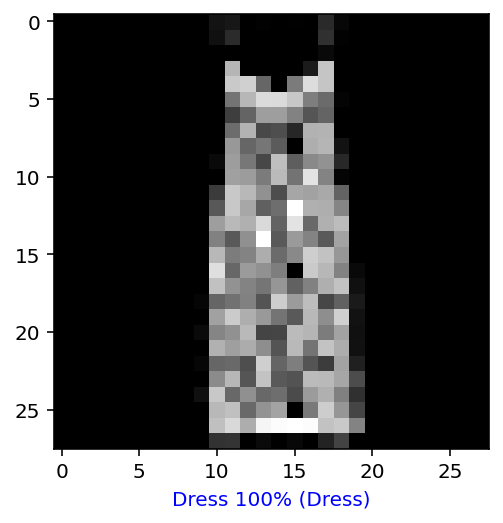

In [34]:
plt.imshow(test_images[image_selected,:,:,0], cmap="gray")
if predicted_label == true_label:
    color = 'blue'
else:
    color = 'red'
plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
plt.show()